In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from numpyGillespie import Gillespie as gil

In [5]:
# Define some testing values.
# The list of initial values of species to will track
X = [1000,]

# The list of rate constants
C = [0.5,]

# the change in X that results from the change from rate constant c
# in this case X = X - 1
# since one X decays and we do not track the decay product
change = [lambda u: [u[0] - 1.0,],]
# Where u[0] takes the first element from the X list

# and the H value is the number of distinct R, molecular reactant
# combinations available in the state
# In this case one for each
perm = [lambda u: u[0],]

In [6]:
out = gil(X, C, change, perm, max_sim_rxn=1000).simulate()

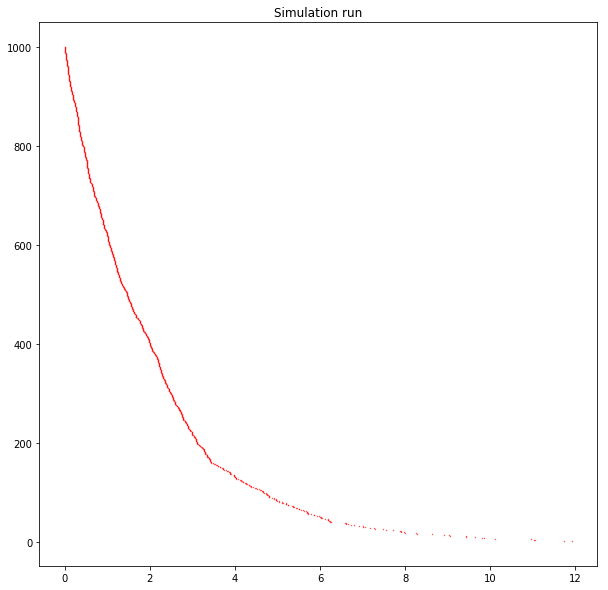

In [7]:
plt.figure(1, figsize=(10,10))
plt.scatter(out[0], [y[0] for y in out[1]], marker=".", s=.5, alpha=0.9, color = 'r')
plt.title("Simulation run")
plt.show()

In [8]:
exp_runs = list()

for i in tqdm(range(100), desc="Running simulations"):
    exp_runs.append(gil(X, C, change, perm, max_sim_rxn=1000).simulate())

Running simulations: 100%|██████████| 100/100 [00:01<00:00, 88.60it/s]


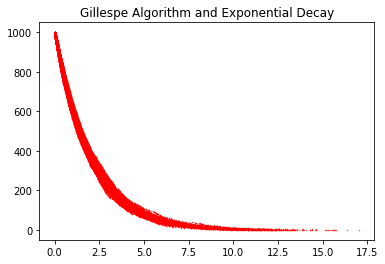

In [9]:
for run in exp_runs:
    # unzip the data
    r = zip(*run)
    t, x = zip(*r)
    plt.scatter(run[0], [y[0] for y in run[1]], marker=".", s=.5, alpha=0.9, color = 'r')
    
    
plt.title('Gillespe Algorithm and Exponential Decay')
plt.show()

## Complete Output

In [ ]:
# Load into pandas
import pandas as pd0

In [ ]:
from bokeh.palettes import brewer

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [ ]:
from numpyGillespie import CompleteGillespie as cg
from numpyGillespie import pandas_output

In [ ]:
complete_out = cg(X, C, change, perm, max_sim_rxn=1000).simulate()

In [ ]:
enumerate(complete_out['species'])

In [ ]:
data = pandas_output(complete_out)

In [ ]:
XX = [3000]

CC = [5., 0.005]

XC = [lambda j: [j[0] + 1],
      lambda j: [j[0] - 2]]

HH = [lambda k: k[0],
      lambda k: k[0] * (k[0] -1) / 2.]

In [ ]:
comp_out_2 = cg(XX, CC, XC, HH, max_sim_rxn=10000).simulate()

In [ ]:
plt.figure(1, figsize=(10,10))
plt.scatter(comp_out_2[0], [y[0] for y in comp_out_2[1]], marker=".", s=.5, alpha=0.9, color = 'r')
plt.title("Simulation run")
plt.show()

In [ ]:
output_notebook()

In [ ]:
p = figure(output_backend="webgl")
p.scatter(
    comp_out_2[0],
    [y[0] for y in comp_out_2[1]],
    alpha=0.1)
show(p)

In [ ]:
comp_out_2

In [ ]:
p = figure(output_backend="webgl")

p.patch(time, av2)

show(p)